In [1]:
# Formação Cientista de Dados - Douglas De Rizzo Meneghetti
# Colaboração: Adriano Santos

# Classificação da base de dados Iris utilizando um perceptron multi-camadas em Keras

# A base de dados Iris contém 4 medidas de 150 flores individuais de 3 espécies distintas (50 flores de cada espécie). Ela foi criada em 1936 por Ronald Fisher. As medidas são a altura e larguras das pétalas e sépalas de cada flor e as espécies de flores são iris setosa, iris versicolor e iris virginica, apresentadas nas imagens abaixo.

In [26]:
# Este código em Python utiliza as bibliotecas Matplotlib, TensorFlow, e scikit-learn para criar e treinar um modelo de aprendizado de máquina. Primeiro, ele importa essas bibliotecas. Em seguida, carrega o conjunto de dados Iris usando scikit-learn e divide-o em conjuntos de treinamento e teste. O modelo de rede neural é definido como sequencial com camadas densas. Após o treinamento, ele gera um relatório de classificação e uma matriz de confusão para avaliar o desempenho do modelo na tarefa de classificação do conjunto de dados Iris.

import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Neste caso, o comentário sugere a instalação da biblioteca TensorFlow usando o comando "%pip install tensorflow," que é comum em ambientes de desenvolvimento Python para instalar pacotes externos. No entanto, como é apenas um comentário, ele não tem impacto direto no código e serve apenas como uma dica para o programador.

# %pip install tensorflow

Visualizando a Iris

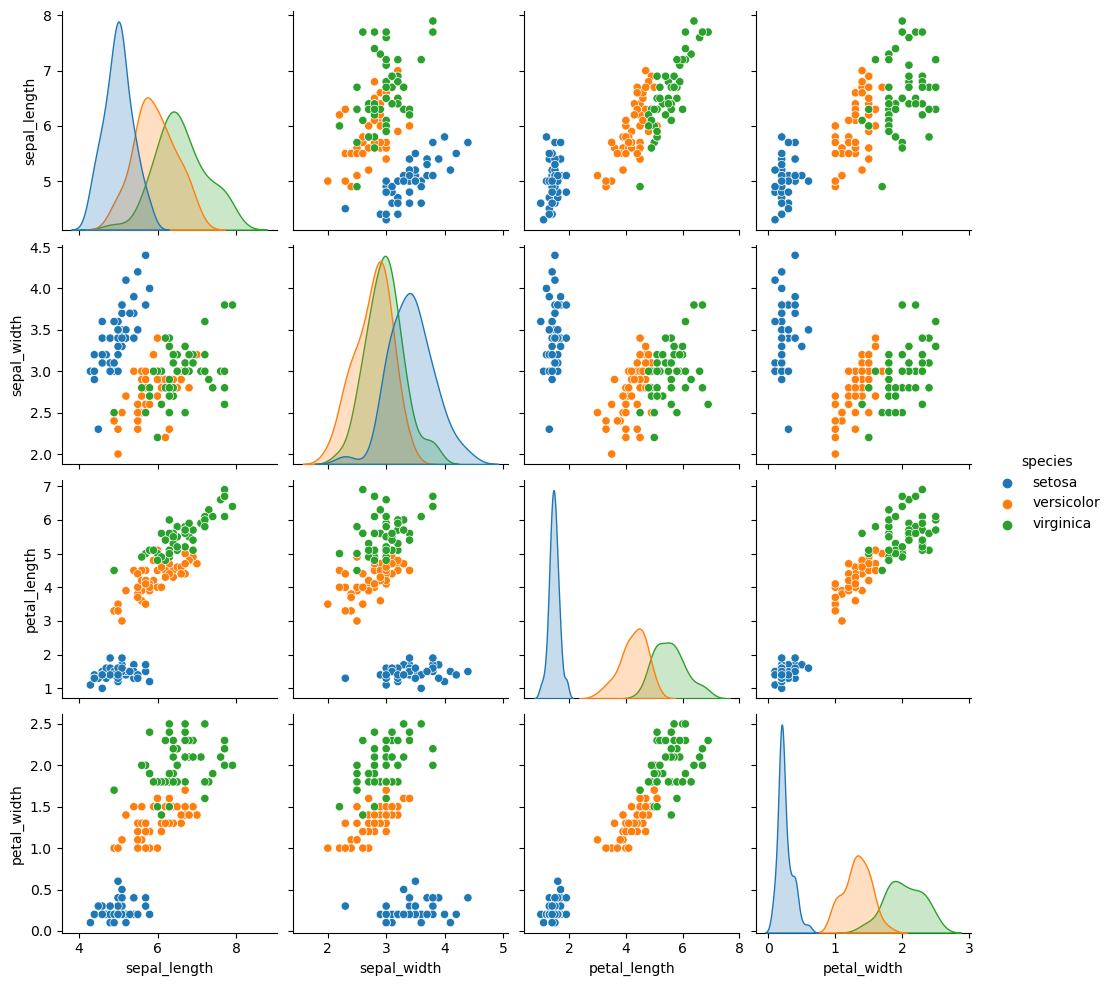

In [27]:
# Neste código em Python, estamos utilizando a biblioteca Seaborn para criar um gráfico de dispersão em pares. Primeiro, carregamos o conjunto de dados "iris", que contém informações sobre diferentes espécies de flores iris. Em seguida, usamos a função "pairplot" para criar um gráfico de dispersão que exibe as relações entre as variáveis do conjunto de dados. A opção "hue" é definida como "species" para colorir os pontos de acordo com as espécies de iris, tornando mais fácil identificar padrões ou diferenças entre elas. O resultado é uma matriz de gráficos de dispersão que auxilia na análise exploratória dos dados.

import seaborn as sns

iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

Preparando os dados

In [29]:
# Neste código em Python, estamos usando a biblioteca scikit-learn para carregar o conjunto de dados Iris, que contém informações sobre flores. As variáveis 'iris_X' e 'iris_y' armazenam as características das flores e suas respectivas classes, respectivamente. Em seguida, exibimos a quantidade de itens no conjunto de treinamento, as classes das flores e os detalhes das medidas das primeiras 5 flores, oferecendo uma visão inicial dos dados.

iris_X, iris_y = load_iris(return_X_y=True)
print('Quantidade de itens no conjunto de treinamento:', len(iris_X))
print('\nClasses:', iris_y)
print('\nExemplos das medidas de 5 flores:')
print(iris_X[:5])


Quantidade de itens no conjunto de treinamento: 150

Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Exemplos das medidas de 5 flores:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [30]:
# Nesse código, estamos dividindo um conjunto de dados em treinamento e teste usando a função train_test_split do scikit-learn. O conjunto de recursos iris_X e os rótulos iris_y são divididos em X_train, X_test, y_train e y_test. O parâmetro test_size=0.2 indica que 20% dos dados serão usados para teste, enquanto random_state=123 garante a reprodutibilidade da divisão. Em seguida, são impressas as quantidades de itens nos conjuntos de treinamento e teste, proporcionando uma visão rápida das dimensões dos dados divididos.

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=123
)

print('Quantidade de itens no conjunto de treinamento:', len(y_train))
print('Quantidade de itens no conjunto de teste:', len(y_test))

Quantidade de itens no conjunto de treinamento: 120
Quantidade de itens no conjunto de teste: 30


One-hot encoding

In [31]:
# Neste código simples, estamos transformando os rótulos de nossos dados em algo mais compreensível para o computador. Primeiro, convertemos os rótulos de treinamento e teste em um formato chamado "one-hot encoding", que ajuda o modelo a entender as classes. Em seguida, imprimimos os cinco primeiros rótulos originais e suas versões codificadas para visualizar como essa transformação funciona. Essa etapa é importante para preparar os dados para treinar um modelo de aprendizado de máquina.

y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)

# Imprime os 5 primeiros valores para exemplificar
print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

print("\n### Depois ###")
print(y_train_onehot[:5])
print(y_test_onehot[:5])


### Antes ###
[2 2 0 0 1]
[1 2 2 1 0]

### Depois ###
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


Declarando a topologia da rede neural

In [32]:
def create_model():
  model = Sequential()
  model.add(Dense(10, activation='tanh', input_dim=4))
  model.add(Dense(8,activation='tanh'))
  model.add(Dense(6,activation='tanh'))
  model.add(Dense(3,activation='softmax'))
  model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model=create_model()

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Esses comandos em Python utilizam o gerenciador de pacotes pip para instalar duas bibliotecas, SE precisar: pydot e graphviz. Pydot é uma biblioteca para criação e manipulação de gráficos e diagramas, enquanto graphviz é uma ferramenta de código aberto para visualização de grafos. Essas instalações são necessárias para trabalhar com gráficos e visualizações em projetos de programação, especialmente quando se deseja representar informações de forma gráfica em Python.

%pip install pydot
%pip install graphviz

Treinando a rede

In [33]:
# Neste código, estamos usando um modelo de aprendizado de máquina (provavelmente um modelo de rede neural) para treinar nossos dados de treinamento (X_train) em relação às suas saídas correspondentes codificadas em one-hot (y_train_onehot) ao longo de 500 épocas de treinamento. Além disso, estamos reservando 10% dos dados de treinamento como conjunto de validação para monitorar o desempenho do modelo durante o treinamento. A opção "verbose=2" indica que queremos informações detalhadas sobre o progresso do treinamento exibidas durante o processo. O histórico do treinamento é armazenado na variável 'history' para análises posteriores.

history = model.fit(
    X_train, 
    y_train_onehot, 
    validation_split=.1, 
    epochs=500, 
    verbose=2
)

Epoch 1/500


4/4 - 2s - loss: 1.1631 - categorical_accuracy: 0.3056 - val_loss: 1.1017 - val_categorical_accuracy: 0.5000 - 2s/epoch - 585ms/step
Epoch 2/500
4/4 - 0s - loss: 1.1432 - categorical_accuracy: 0.3056 - val_loss: 1.0917 - val_categorical_accuracy: 0.5000 - 96ms/epoch - 24ms/step
Epoch 3/500
4/4 - 0s - loss: 1.1236 - categorical_accuracy: 0.3056 - val_loss: 1.0869 - val_categorical_accuracy: 0.5000 - 75ms/epoch - 19ms/step
Epoch 4/500
4/4 - 0s - loss: 1.1127 - categorical_accuracy: 0.3056 - val_loss: 1.0847 - val_categorical_accuracy: 0.4167 - 75ms/epoch - 19ms/step
Epoch 5/500
4/4 - 0s - loss: 1.1035 - categorical_accuracy: 0.2222 - val_loss: 1.0855 - val_categorical_accuracy: 0.4167 - 72ms/epoch - 18ms/step
Epoch 6/500
4/4 - 0s - loss: 1.0990 - categorical_accuracy: 0.3611 - val_loss: 1.0878 - val_categorical_accuracy: 0.4167 - 68ms/epoch - 17ms/step
Epoch 7/500
4/4 - 0s - loss: 1.0938 - categorical_accuracy: 0.3611 - val_loss: 1.0910 - val_categorical_accuracy: 0.4167 - 66ms/epoch - 1

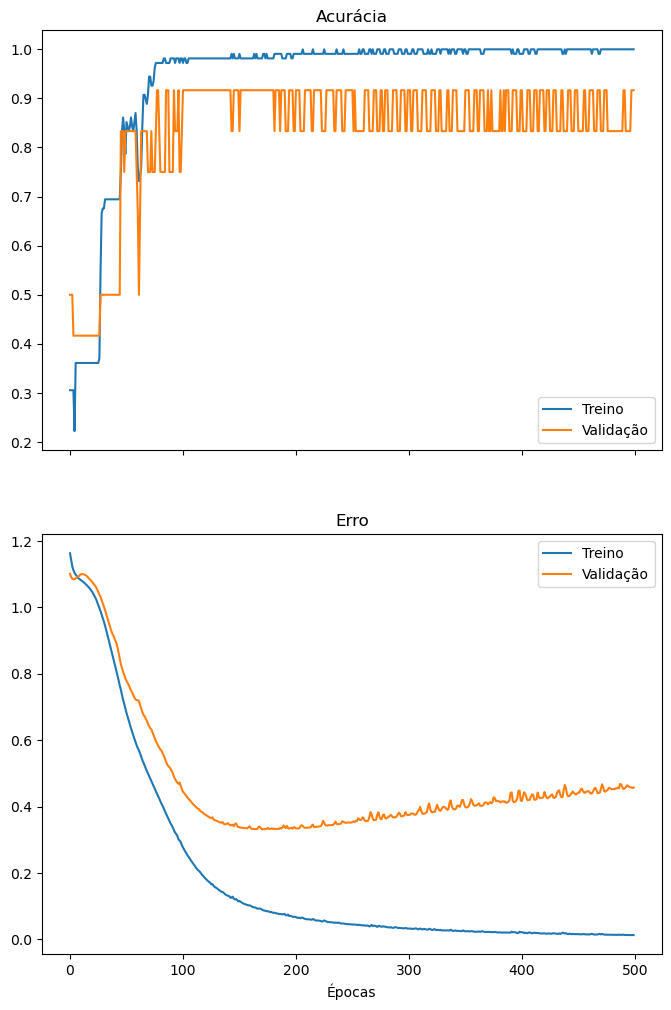

In [34]:
# Este código em Python define uma função chamada `plot_metrics` que recebe um histórico de treinamento como entrada. Ele cria um gráfico de duas subplots, uma para a métrica de acurácia e outra para a métrica de erro (loss) ao longo das épocas de treinamento de um modelo de machine learning. A primeira subplot mostra a acurácia tanto no treinamento quanto na validação (se disponível), enquanto a segunda subplot exibe a perda (loss) no treinamento e na validação (se disponível). O gráfico resultante ajuda a visualizar o desempenho do modelo ao longo do tempo, permitindo identificar tendências e problemas de treinamento. É importante notar que este código depende da biblioteca Matplotlib para gerar os gráficos.

def plot_metrics(history):
  fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

- O gráfico acima parece ser de dois gráficos de linha, um mostrando a acurácia e o outro mostrando o erro, para um modelo de aprendizado de máquina. 
- O gráfico superior é intitulado "Acurácia" e o inferior é intitulado "Erro". 
- Ambos os gráficos têm o eixo x rotulado como "Épocas". 
- O eixo y do gráfico superior é rotulado como "0.2-1.0" e o eixo y do gráfico inferior é rotulado como "0.0-1.2". 
- O gráfico superior e inferior tem duas linhas, uma azul e outra laranja, representando "Treino" e "Validação", respectivamente. 
- As linhas em ambos os gráficos parecem estar flutuando. 

Overfitting

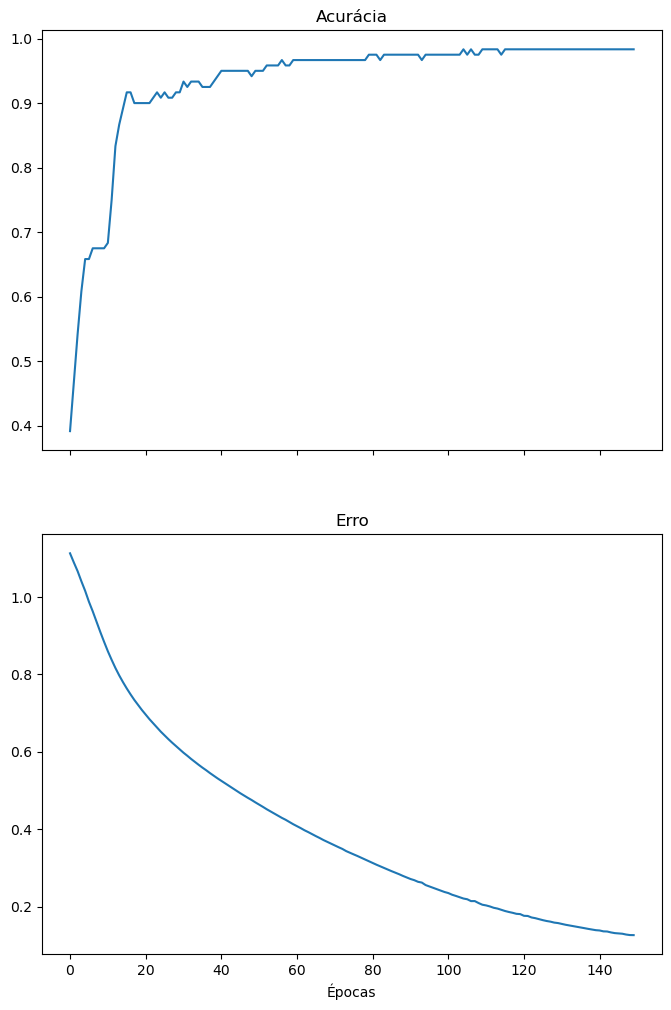

In [37]:
# Nesse código, é criado um modelo de machine learning usando a função 'create_model()'. Em seguida, o modelo é treinado com os dados de treinamento 'X_train' e seus rótulos correspondentes 'y_train_onehot' ao longo de 150 épocas, com a opção 'verbose=0' para suprimir a exibição de informações durante o treinamento. Por fim, a função 'plot_metrics' é chamada para visualizar as métricas de desempenho do treinamento, como gráficos de perda e acurácia.

model = create_model()
history = model.fit(X_train, y_train_onehot, epochs=150, verbose=0)
plot_metrics(history)

- O gráfico superior é intitulado "Acurácia". O eixo x é rotulado como "Épocas" e o eixo y varia de 0.4 a 1.0. A linha azul começa no canto superior esquerdo do gráfico e diminui acentuadamente antes de se estabilizar.

- O gráfico inferior é intitulado "Erro". O eixo x é rotulado como "Épocas" e o eixo y varia de 0.2 a 1.0. A linha azul começa no canto superior esquerdo do gráfico e diminui constantemente.

- Ambos os gráficos parecem representar o desempenho de um modelo de aprendizado de máquina ao longo das épocas, com a acurácia aumentando e o erro diminuindo à medida que o número de épocas aumenta.

Realizando inferências com o modelo treinado

In [13]:
# Nesse código, estamos realizando uma previsão de valores usando um modelo (provavelmente de machine learning) previamente treinado. A variável 'y_pred' vai armazenar as previsões feitas pelo modelo para os dados de teste 'X_test'. Em seguida, utilizamos 'print(y_pred)' para exibir essas previsões na tela. Isso é útil para avaliar o desempenho do modelo e comparar suas previsões com os valores reais, ajudando na análise e tomada de decisões.

y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 195ms/step
[[0.01092972 0.3101908  0.67887944]
 [0.00464017 0.08187772 0.9134821 ]
 [0.00333885 0.04894817 0.9477129 ]
 [0.01550821 0.9623337  0.02215817]
 [0.95943916 0.03635314 0.00420773]
 [0.01378096 0.48034438 0.50587475]
 [0.0169212  0.8918566  0.09122222]
 [0.95856005 0.03712485 0.00431511]
 [0.9566577  0.03876885 0.00457339]
 [0.01569257 0.8503451  0.13396241]
 [0.01111801 0.28266668 0.70621526]
 [0.95980257 0.03612399 0.00407345]
 [0.01526218 0.94848424 0.03625363]
 [0.00496656 0.0963998  0.8986336 ]
 [0.00359181 0.05328869 0.94311947]
 [0.00332552 0.04911799 0.9475565 ]
 [0.96090287 0.03480135 0.00429575]
 [0.9593016  0.03641846 0.00427992]
 [0.01555393 0.8785511  0.10589502]
 [0.95783263 0.03760782 0.00455959]
 [0.9600683  0.03559045 0.00434134]
 [0.01062738 0.3156915  0.67368114]
 [0.95391595 0.04140073 0.0046834 ]
 [0.01227882 0.39085913 0.596862  ]
 [0.95909035 0.03667525 0.00423437]
 [0.95859694 0.03687058 0.00453241]
 [0.9594588

- O resultado é uma matriz de probabilidades, onde cada linha representa uma observação do conjunto de testes e cada coluna representa uma classe.

- Por exemplo, a primeira linha [0.01092972 0.3101908  0.67887944] indica que o modelo previu que a primeira observação tem uma probabilidade de 1.09% de pertencer à primeira classe, 31.02% de pertencer à segunda classe e 67.89% de pertencer à terceira classe.

- Da mesma forma, a segunda linha [0.00464017 0.08187772 0.9134821 ] indica que o modelo previu que a segunda observação tem uma probabilidade de 0.46% de pertencer à primeira classe, 8.19% de pertencer à segunda classe e 91.35% de pertencer à terceira classe.

In [38]:
# Nesse código em Python, estamos realizando uma tarefa de classificação. Primeiro, `y_pred_onehot` é uma variável que armazena as classes previstas pelo modelo, obtidas a partir do índice da classe com maior probabilidade em cada linha dos resultados `y_pred`. Em seguida, são impressas as classes reais do conjunto de teste (`y_test`) e as classes preditas (`y_pred_onehot`) para fins de avaliação do desempenho do modelo.

y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
Classes preditas:	 [2 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]


O código que você executou está comparando as classes reais com as classes preditas por um modelo de aprendizado de máquina.

- `y_test` são as classes reais do seu conjunto de teste.
- `y_pred_onehot` são as classes preditas pelo seu modelo.

Cada número representa uma classe. Por exemplo, no seu caso, você tem três classes: 0, 1 e 2.

Ao comparar as duas listas, você pode ver onde o modelo fez previsões corretas e onde errou. Por exemplo, a primeira classe real é 1, mas o modelo previu 2. Isso significa que o modelo errou nessa instância. No entanto, na segunda instância, tanto a classe real quanto a predita são 2, o que significa que o modelo acertou.

Essa comparação é útil para entender o desempenho do seu modelo. Se as classes reais e as preditas forem iguais para todas as instâncias, isso significa que seu modelo tem uma precisão perfeita. No entanto, na prática, isso raramente acontece e é normal que haja algumas discrepâncias.

Avaliando a rede treinada

In [39]:
# Esse código em Python exibe um relatório de classificação para avaliar o desempenho de um modelo de aprendizado de máquina. Ele compara as previsões (y_pred_onehot) com os rótulos reais (y_test) dos dados de teste e fornece métricas como precisão, recall e F1-score para avaliar o quão bem o modelo está classificando os dados. O resultado é uma visão resumida da qualidade das previsões do modelo, essencial para entender seu desempenho de forma concisa.

print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



O texto acima é um relatório de classificação que fornece uma visão detalhada do desempenho do seu modelo de aprendizado de máquina. Aqui está o que cada termo significa:

- **Precision**: A precisão é a proporção de verdadeiros positivos (as instâncias corretamente classificadas como pertencentes a uma classe) em relação a todas as instâncias que foram classificadas como pertencentes a essa classe (verdadeiros positivos e falsos positivos). Por exemplo, uma precisão de 1.00 para a classe 0 indica que todas as instâncias que o modelo classificou como pertencentes à classe 0 realmente pertencem à classe 0.

- **Recall**: O recall é a proporção de verdadeiros positivos em relação a todas as instâncias que realmente pertencem a essa classe (verdadeiros positivos e falsos negativos). Por exemplo, um recall de 1.00 para a classe 0 indica que o modelo identificou corretamente todas as instâncias da classe 0.

- **F1-score**: O F1-score é uma média harmônica entre precisão e recall. Um F1-score perfeito é 1.00, onde tanto a precisão quanto o recall são perfeitos, e o pior valor é 0. 

- **Support**: O suporte é o número de ocorrências de cada classe no conjunto de dados de teste. Por exemplo, há 13 instâncias da classe 0 no conjunto de teste.

- **Accuracy**: A acurácia é a proporção de instâncias corretamente classificadas em relação a todas as instâncias no conjunto de dados de teste.

- **Macro avg**: A média macro calcula a média das métricas para cada classe sem levar em conta o desequilíbrio de classes.

- **Weighted avg**: A média ponderada calcula a média das métricas para cada classe, levando em consideração o desequilíbrio de classes.

No seu caso, o modelo teve um desempenho muito bom, com uma acurácia geral de 97%.

Matriz de confusão

In [41]:
# O código exibe uma matriz de confusão, uma ferramenta essencial em aprendizado de máquina, para avaliar o desempenho de um modelo. Ele compara as previsões (y_pred_onehot) com os valores reais (y_test) e mostra quantas vezes o modelo acertou ou errou cada classe em um formato de matriz. Essa matriz ajuda a entender o desempenho do modelo, identificando falsos positivos, falsos negativos e classificações corretas, sendo útil na avaliação de modelos de classificação.

print(confusion_matrix(y_test, y_pred_onehot))

[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


Aqui está o que cada parte da matriz significa:

- A primeira linha da matriz `[13 0 0]` indica que todas as 13 instâncias da classe 0 foram corretamente classificadas pelo modelo (verdadeiros positivos).

- A segunda linha `[0 5 1]` indica que das instâncias da classe 1, o modelo classificou corretamente 5 instâncias como classe 1 (verdadeiros positivos), mas classificou erroneamente 1 instância como classe 2 (falsos positivos).

- A terceira linha `[0 0 11]` indica que todas as 11 instâncias da classe 2 foram corretamente classificadas pelo modelo (verdadeiros positivos).

Em resumo, o modelo fez um bom trabalho na classificação das instâncias, com apenas um erro onde uma instância da classe 1 foi erroneamente classificada como classe 2.